❤️ Heart Failure Prediction Project


Life Cycle of Machine Learning Project

### 1) Understanding the Problem Statement

Heart failure is a serious medical condition where the heart cannot pump enough blood to meet the body’s needs.
Early prediction of patient survival is crucial for medical intervention and treatment planning.

Objective

Build a classification model to predict whether a patient will die (DEATH_EVENT = 1) or survive (DEATH_EVENT = 0) based on clinical features


### 2) Data Collections

The dataset consists of clinical records of heart failure patients.

Rows: Patients

Columns: Clinical features + target variable

Target Variable: DEATH_EVENT



### Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [62]:
# load dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [44]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [63]:
# Summary Statistics
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


It collects health-related metrics on 299 patients, on average around the age of 61, with special focus on values such as heart failure, specifically the percentage of patients with an average of 38% or less, such as creatine, creatine phosphokinase, diabetes, hypertension, etc.

In [64]:
# Null Values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [65]:
#Separate Numerical & Categorical Features

numeric_features = [col for col in df.columns if df[col].dtype != 'O']
categorical_features = [col for col in df.columns if df[col].dtype == 'O']

print(f"Numerical Features ({len(numeric_features)}): {numeric_features}")
print(f"Categorical Features ({len(categorical_features)}): {categorical_features}")


Numerical Features (13): ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']
Categorical Features (0): []


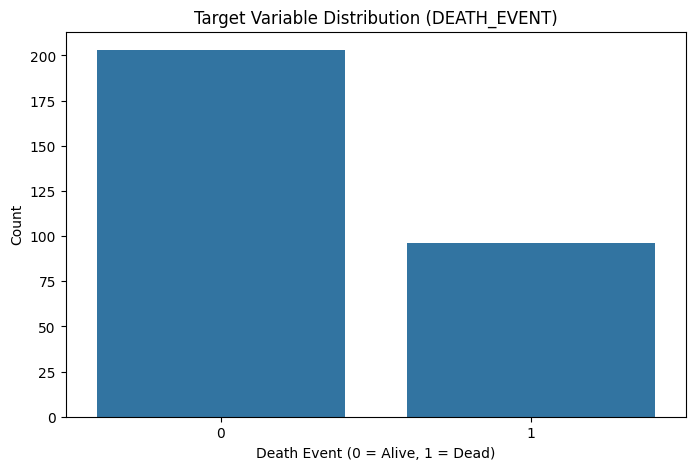

In [67]:
# Target Variable Distribution

df['DEATH_EVENT'].value_counts(normalize=True) * 100


plt.figure(figsize=(8,5))
sns.countplot(x='DEATH_EVENT', data=df)
plt.title("Target Variable Distribution (DEATH_EVENT)")
plt.xlabel("Death Event (0 = Alive, 1 = Dead)")
plt.ylabel("Count")
plt.show()



Target variable is imbalanced

Survival cases are more than death cases

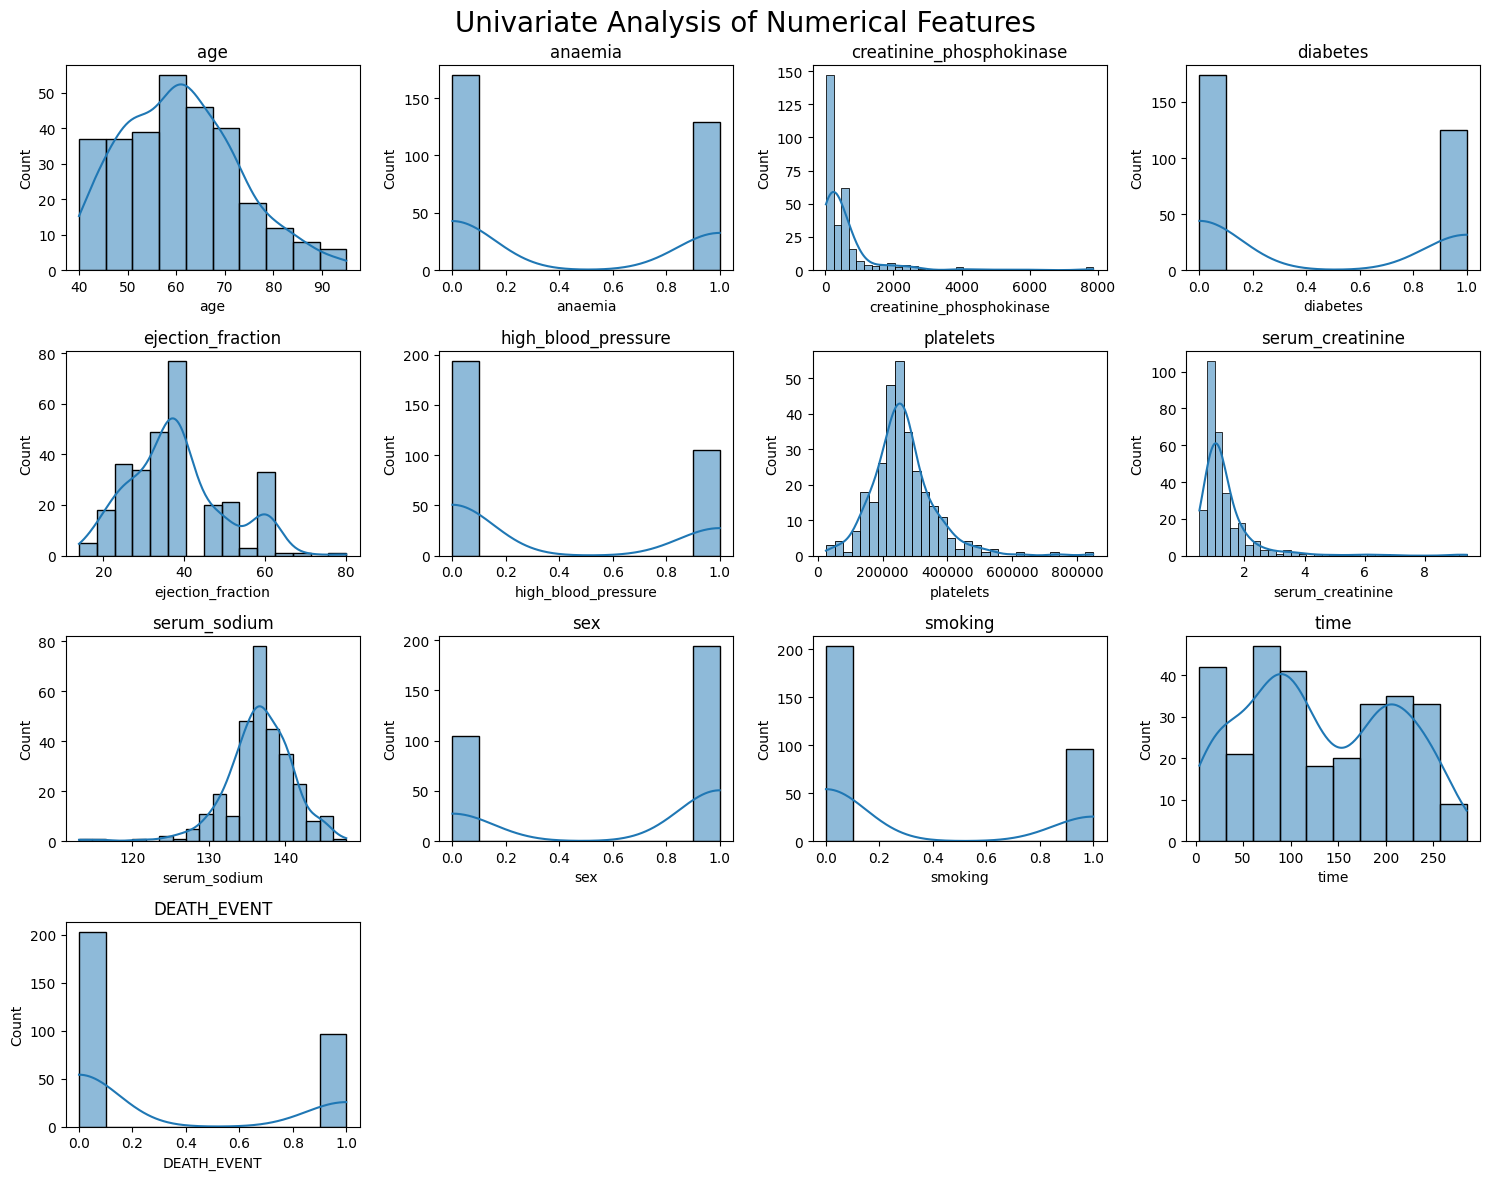

In [68]:
# Univariate Analysis – Numerical Features
plt.figure(figsize=(15, 12))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20)

for i, col in enumerate(numeric_features):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()


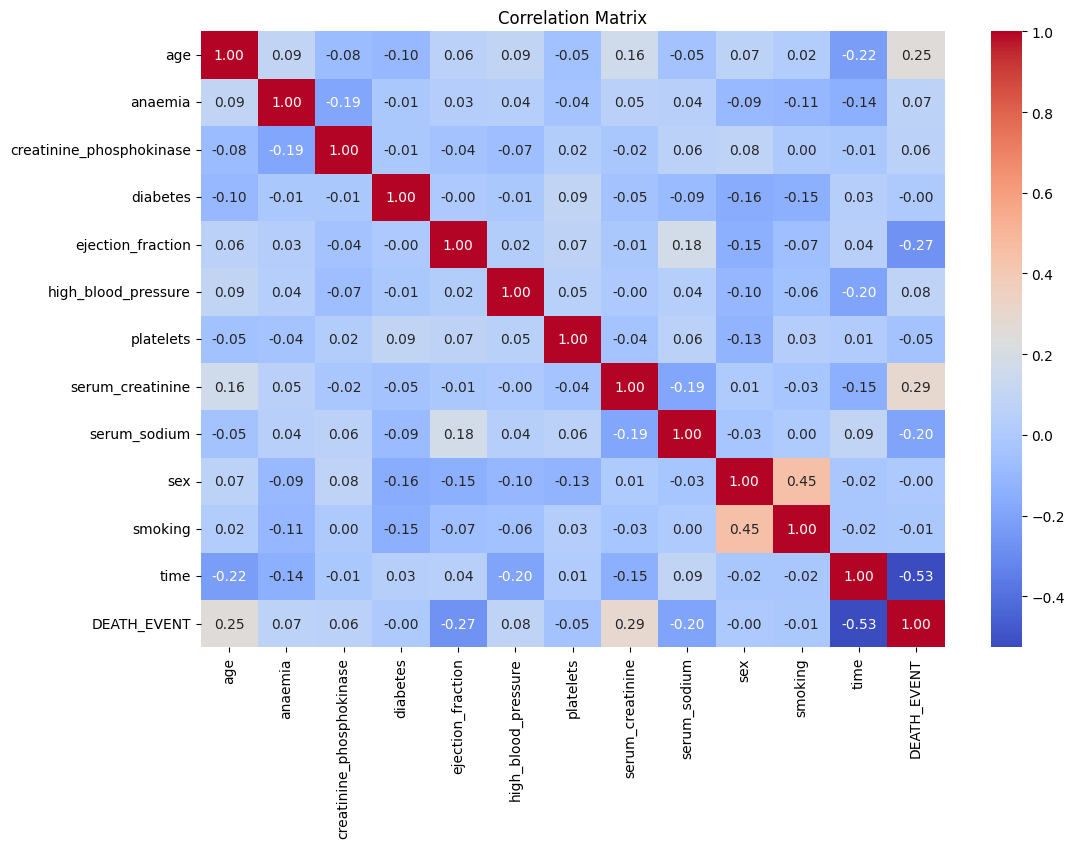

In [69]:
#Correlation Matrix
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


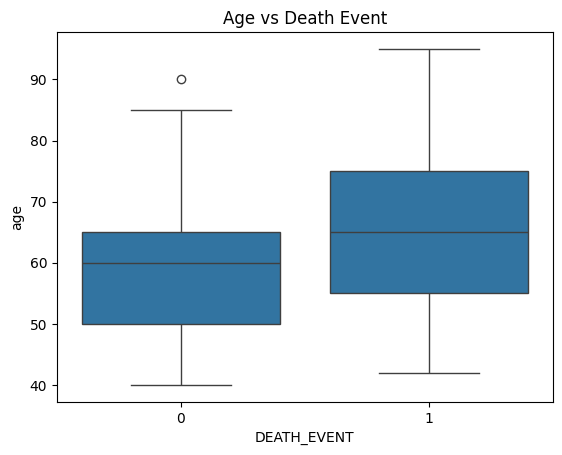

In [73]:
# DEATH_EVENT vs age
plt.figure()
sns.boxplot(x="DEATH_EVENT", y="age", data=df)
plt.title("Age vs Death Event")
plt.show()

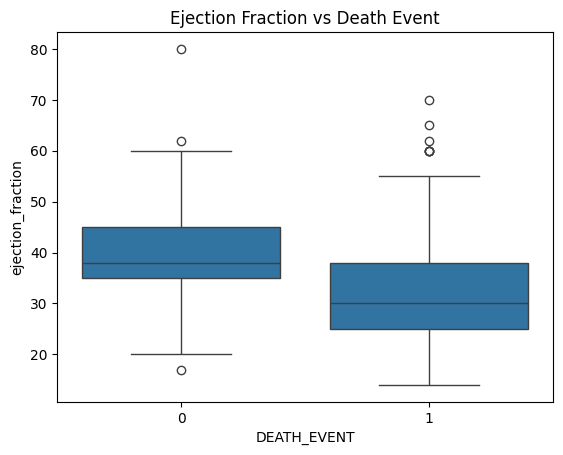

In [74]:
# DEATH_EVENT vs ejection fraction
plt.figure()
sns.boxplot(x="DEATH_EVENT", y="ejection_fraction", data=df)
plt.title("Ejection Fraction vs Death Event")
plt.show()

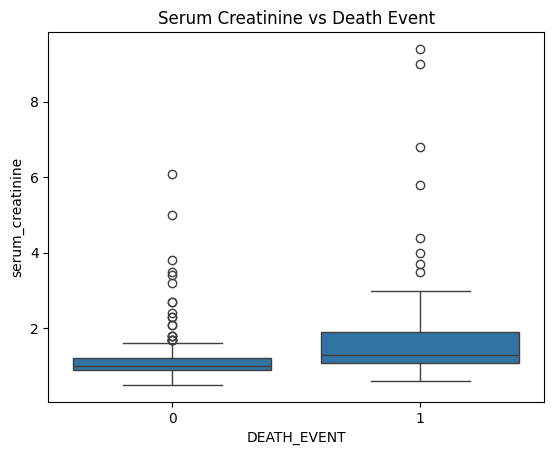

In [75]:
# DEATH_EVENT vs serum creatinine
plt.figure()
sns.boxplot(x="DEATH_EVENT", y="serum_creatinine", data=df)
plt.title("Serum Creatinine vs Death Event")
plt.show()